# Lab 3.4: Jointly Distributed Random Variables

## Outline
- Covariance
- Correlation 
- Independence
- Joint probability distribution
- Marginal probability distribution
- Conditional probability distribution

## Covariance

Covariance measures how much 2 random variables change together:
- **Covariance is positive when **
  - `random variable 1` has a high value when `random variable 2` has a high value
  - `random variable 1` has a low value when `random variable 2` has a low value

<br>

- **Covariance is negative when **
  - `random variable 1` has a low value when `random variable 2` has a high value, and vice versa

<br>

- **Covariance is 0 when **
  - `random variable 1` and `random variable 2` do not have any linear relationship


- Here is the case when covariance is positive

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
x1 = array([10, -10, 30, 50])
x2 = array([2.5, -3.4, 10, 2])

cov(x1, x2)

array([[ 666.66666667,   79.        ],
       [  79.        ,   30.33583333]])

By default, `numpy` returns a covariance matrix, and it has the following form

\begin{bmatrix}
    var(x1) & cov(x1, x2) \\
    cov(x1, x2) & var(x2)
\end{bmatrix}

So the covariance between `x1` and `x2` is 79

- Here is the case when covariance is negative

In [6]:
x1 = array([10, -10, 30, 50])
x2 = array([-2.5, 3.4, -10, -2])

# Calculate the covariance between x1 and x2
# Your code here
cov(x1, x2)

array([[ 666.66666667,  -79.        ],
       [ -79.        ,   30.33583333]])

- Here is the case when covariance is 0

In [7]:
x1 = array([-3, -2, -1, 0, 1, 2, 3])
x2 = array([9, 4, 1, 0, 1, 4, 9])

# Calculate the covariance between x1 and x2
# Your code here
cov(x1, x2)

array([[  4.66666667,   0.        ],
       [  0.        ,  14.        ]])

## Correlation

Correlation is convariance normalized by the standard deviations of the variables.

Therefore, the same rules of covariance apply to correlation, except correlation is bounded between -1 and 1.

Correlation provides a scaled measure of covariance so we can compare correlation across different datasets.

- Here is the case when correlation is positive

In [9]:
x1 = array([10, -10, 30, 50])
x2 = array([2.5, -3.4, 10, 2])

corrcoef(x1, x2)

array([[ 1.        ,  0.55551368],
       [ 0.55551368,  1.        ]])

Again `numpy` returns a correlation matrix, and it has the following form:

\begin{bmatrix}
    corr(x1, x1) & corr(x1, x2) \\
    corr(x2, x1) & corr(x2, x2)
\end{bmatrix}

The correlation of a variable with itself, i.e. $corr(x1, x1)$, is always 1.

- Here is the case when correlation is negative

In [13]:
x1 = array([10, -10, 30, 50])
x2 = array([-2.5, 3.4, -10, -2])

# Calculate the correlation between x1 and x2
# Your code here
corrcoef(x1, x2)

array([[ 1.        , -0.55551368],
       [-0.55551368,  1.        ]])

- Here is the case when correlation is zero / undefined

In [14]:
x1 = array([-3, -2, -1, 0, 1, 2, 3])
x2 = array([9, 4, 1, 0, 1, 4, 9])

# Calculate the correlation between x1 and x2
# Your code here
corrcoef(x1, x2)

array([[ 1.,  0.],
       [ 0.,  1.]])

## Independence


### Continuous Random Variables

If two random variables are correlated, then they are dependent.

**However if two random variables are not correlated, it does not mean they are independent.**

**Correlation describes linear dependencies between random variables, dependency can be described by other types of relationships**

- The example below demonstrates the idea

corr(x1, x2): 0.0


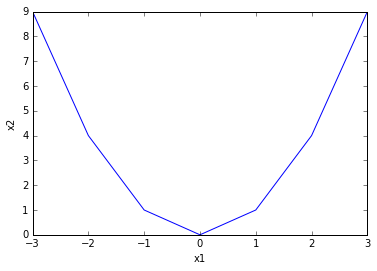

In [15]:
x1 = array([-3, -2, -1, 0, 1, 2, 3])
x2 = array([9, 4, 1, 0, 1, 4, 9])

print('corr(x1, x2):', corrcoef(x1, x2)[0,1])

plot(x1, x2)
xlabel('x1')
ylabel('x2');

$x_1$ and $x_2$ are clearly dependent, but since the relationship is perfectly quadratic, the correlation is 0.

### Discrete Random Variables


**Independence can be estalished by:**

$$p(x, y) = p(x) \times p(y)$$

Say we want to find out if being in Class A or Class B affects one chances of going to college and the data is given below.

|   | Success | Fail |
|---|---------|------|
| A | 20      | 34   |
| B | 15      | 12   |

In [21]:
total = ((20 + 34) + (15 + 12))
p_a = (20 + 34) / total
p_success = (20 + 15) / total
p_a_and_success = 20 / total
print('p(a) * p(success):', p_a * p_success)
print('p(a and success):', p_a_and_success)

p(a) * p(success): 0.28806584362139914
p(a and success): 0.24691358024691357


**Question**: Is getting into college independent of the two classes?

no b/c p(a) * p(success) not equal no b/c p(a) * p(success) not equal 

## Joint / marginal / conditional probability distribution

Joint / marginal / conditional distributions are useful for comparing **trends across different groups** in a dataset. 

Here we illustate how to use these techniques to conduct a **market segmentation analysis**.

- First we read in the data

In [22]:
import pandas as pd

pd.set_option('display.precision', 3)

sales_data = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/gender_product_segmentation.csv', 
                         index_col=0)
sales_data

,Product 1,Product 2,Product 3,Product 4
Male,321,857,404,766
Female,65,471,443,192


-  We get the sum of the rows and sum of the columns

In [26]:
col_sum = sales_data.sum(axis=0)

# Write one line of code to compute the row sums here
row_sum = sales_data.sum(axis=1)

total_sum = sum(row_sum)

print('----- Row sums ----')
print(row_sum)
print() 
print('----- Col sums -----')
print(col_sum)
print() 
print('----- Total sum ----')
print(total_sum)

----- Row sums ----
Male      2348
Female    1171
dtype: int64

----- Col sums -----
Product 1     386
Product 2    1328
Product 3     847
Product 4     958
dtype: int64

----- Total sum ----
3519


## Joint probabilities

- To compute the joint probability, we divide each cell by the `total_sum`

In [28]:
# Compute the joint probability and name is 'sales_joint'
# sales_joint should have the same dimension as the original data table
sales_joint = sales_data/total_sum

sales_joint

,Product 1,Product 2,Product 3,Product 4
Male,0.091,0.244,0.115,0.218
Female,0.018,0.134,0.126,0.055


- To be explicit, the joint probabilities are:

$$P(\text{Product 1} \cap \text{Male}) = 0.09$$
$$P(\text{Product 2} \cap \text{Male}) = 0.24$$
$$P(\text{Product 3} \cap \text{Male}) = 0.11$$
$$P(\text{Product 4} \cap \text{Male}) = 0.22$$


$$P(\text{Product 1} \cap \text{Female}) = 0.02$$
$$P(\text{Product 2} \cap \text{Female}) = 0.13$$
$$P(\text{Product 3} \cap \text{Female}) = 0.13$$
$$P(\text{Product 4} \cap \text{Female}) = 0.05$$

- Now let's visualize the joint probability distribution

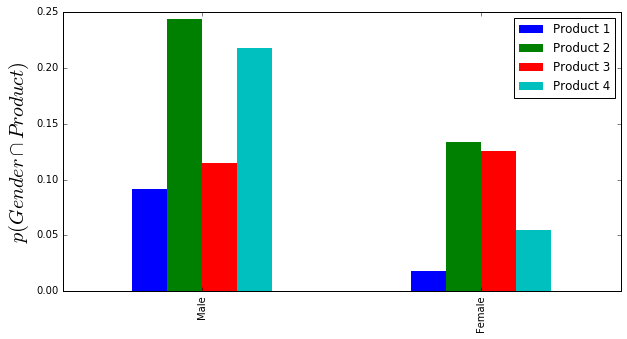

In [29]:
sales_joint.plot(kind='bar', edgecolor='None', figsize=(10, 5))
ylabel('$p(Gender \cap Product)$', fontsize=20);

Just by looking at the joint probability alone, it is tempting to conclude:
- Male buyers prefer **Product 2, 4**
- Female buyers prefer **Product 2, 3**

Let's also look at the marginal probabilities as well.

##Marginal Probabilities

A marginal probability is the sum of joint probabilities over the category of interest.

Say we are interested in gender, the marginal probabilities here would be (`row sum / total sum`)

In [31]:
# Compute and print the marginal probabilities for gender

sales_joint.sum(axis = 1)

Male      0.667
Female    0.333
dtype: float64

There are twice as much male buyers compared to female buyers

Since we are dividing each cell with the total count when we are calculating joint probabilities, we are not taking into account the skewed distribution of buyers of different genders

**We need to take into account the fact that there are more male buyers**, and we turn to conditional probabilities for that.

## Conditional Probabilities

Conditional probability is computed by considering each group of interest individually.

We could look at female buyers as if there are no male buyers and only examine the female buyers' behavior. 

And the same applies to male buyers.

To compute a conditional probability, we divide the row by the row sum of that corresponding row.

In [36]:
male_sum = row_sum[0]
female_sum = row_sum[1]

sales_data_conditional = sales_data.copy()
sales_data_conditional.ix['Male'] = sales_data.ix['Male'] / male_sum
sales_data_conditional.ix['Female'] = sales_data.ix['Female'] / female_sum

# Compute the conditional distribution of buyers' behavior for female buyers

sales_data_conditional

,Product 1,Product 2,Product 3,Product 4
Male,0.137,0.365,0.172,0.326
Female,0.056,0.402,0.378,0.164


- Now let's visualize the conditional probability distribution

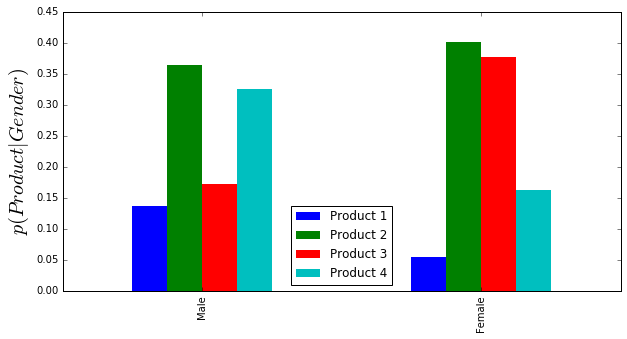

In [37]:
sales_data_conditional.plot(kind='bar', edgecolor='None', figsize=(10, 5))
ylabel('$p(Product | Gender)$', fontsize=20);

Now we are treating female and male buyers equally regardless of the number of buyer for each gender

We can conclude:
- Male buyers prefer **Product 2,4**
- Female buyers prefer **Product 2,3**

## Exercises

**Question 1**
- Read in the file https://s3-us-west-2.amazonaws.com/dsci/6002/data/admissions.csv and complete the following tasks:
   - Implement a function to calculate covariance (does not need to be in matrix form)
   - Implement a function to calcualte correlation (does not need to be in matrix form)
   - Identify the variable that is the most correlated with `gpa`

In [42]:
pd.set_option('display.precision', 3)

df = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/admissions.csv')
df.head()

   family_income   gpa  parent_avg_age
0        31402.0  3.18              32
1        32247.0  2.98              48
2        34732.0  2.85              61
3        53759.0  3.39              62
4        50952.0  3.10              45


In [63]:
# Implement a function to calculate covariance (does not need to be in matrix form)

gpa = df.gpa.as_matrix()
print(gpa)
family_income = df.family_income.as_matrix()
print(family_income)
parent_avg_age = df.parent_avg_age.as_matrix()
print(parent_avg_age)

print("\n", cov(gpa, family_income),"\n\n",
cov(gpa, parent_avg_age),"\n\n",
cov(parent_avg_age, family_income))


# Implement a function to calcualte correlation (does not need to be in matrix form)
print("\n", corrcoef(gpa, family_income),"\n\n",
corrcoef(gpa, parent_avg_age),"\n\n",
corrcoef(parent_avg_age, family_income))


# Identify the variable that is the most correlated with gpa

#family income is most correlated with gpa, because it is closest to 1.

[ 3.18  2.98  2.85 ...,  2.67  2.23  3.04]
[ 31402.  32247.  34732. ...,  23611.   5329.  60230.]
[32 48 61 ..., 36 63 61]

 [[  8.78911925e-02   4.01529909e+03]
 [  4.01529909e+03   3.32941046e+08]] 

 [[  8.78911925e-02  -2.87852599e-02]
 [ -2.87852599e-02   1.12977442e+02]] 

 [[  1.12977442e+02  -1.22632628e+03]
 [ -1.22632628e+03   3.32941046e+08]]

 [[ 1.          0.74226939]
 [ 0.74226939  1.        ]] 

 [[ 1.         -0.00913485]
 [-0.00913485  1.        ]] 

 [[ 1.         -0.00632305]
 [-0.00632305  1.        ]]


**Question 2**
- Is `gpa` independent of the `family_income`? Why or why not?

In [ ]:
no, since the two random variables are correlated, then they are dependent.

**Question 3**
- By categorizing the `gpa` into low/medium/high and `family_income` into `low/medium/high` (choose cut-off values that make sense to you), compute the conditional probability distributions and conduct analysis about how `family_income` affects `gpa`.

In [219]:
import pprint

l = df.family_income.quantile(q=.25)
m = df.family_income.quantile(q=.5)
h = df.family_income.quantile(q=.75)

l_gpa = df.gpa.quantile(q=.25)
m_gpa = df.gpa.quantile(q=.5)
h_gpa = df.gpa.quantile(q=.75)

low = []
medium = []
high = []

def lmh(blah):
    if blah < l:
        return "low"
    elif blah >= l and blah <= h:
        return "medium"
    else:
        return "high"
    
def lmh_gpa(blah):
    if blah < l_gpa:
        return "low"
    elif blah >= l_gpa and blah <= h_gpa:
        return "medium"
    else:
        return "high"
    
for i in family_income:
    if i < l:
        low.append(i)
    if i > l and i < h:
        medium.append(i)
    if i > h:
        high.append(i)
        
# pprint.pprint(high)

# compute the conditional probability distributions and conduct analysis about how family_income affects gpa.

# To compute a conditional probability, we divide the row by the row sum of that corresponding row.
# low_sum = sum(low)
# medium_sum = sum(low)
# high_sum = sum(low)

In [220]:
df['income_tier'] = df.apply(lambda row: lmh(row["family_income"]), axis=1)
df['gpa_tier'] = df.apply(lambda row: lmh_gpa(row["gpa"]), axis=1)


In [227]:
import seaborn as sns
df.head()
crosstab = pd.crosstab(df['income_tier'], df['gpa_tier'], margins=True)

crosstab

gpa_tier,high,low,medium,All
income_tier,,,,
high,1598,0,1150,2748
low,14,1764,970,2748
medium,1043,953,3500,5496
All,2655,2717,5620,10992


       family_income        gpa  parent_avg_age
count      10992.000  10992.000       10992.000
mean       40191.637      2.998          47.812
std        18246.672      0.296          10.629
min          168.000      2.010          30.000
25%        26832.750      2.800          39.000
50%        37510.000      2.990          48.000
75%        51112.250      3.200          57.000
max       125508.000      3.970          66.000


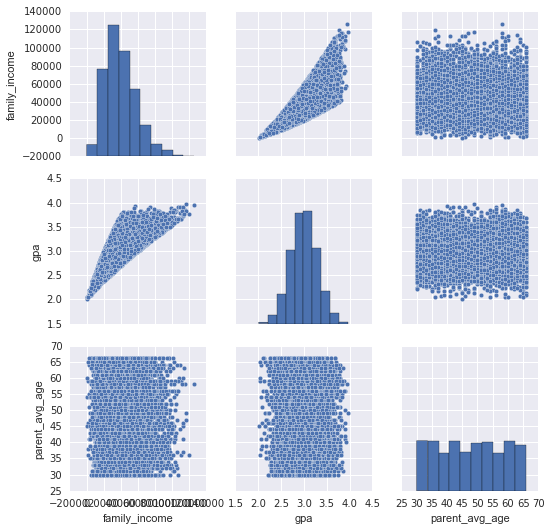

In [225]:

print(df.describe())
sns.pairplot(df)

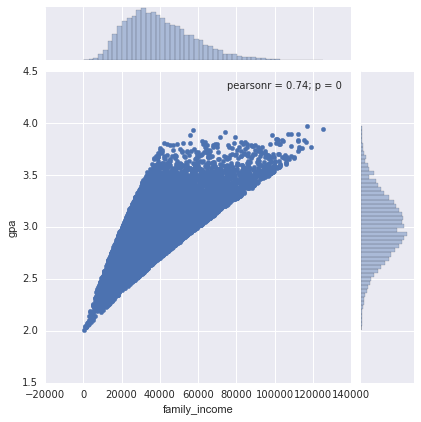

In [222]:
# df.stack(level=['income_tier'])
sns.jointplot(x='family_income', y="gpa", data=df)

In [223]:
family_income_conditional = family_income.copy()

row_sum = crosstab.sum(axis=1)/2

print(row_sum)
low_sum = row_sum[0]
print(row_sum[0])
print(row_sum[1])

print("here", crosstab.ix['low'])
# crosstab.ix['low'] = crosstab.ix['low'] / 2748
# sales_data_conditional.ix['Female'] = sales_data.ix['Female'] / female_sum

# # Compute the conditional distribution of buyers' behavior for female buyers

# sales_data_conditional

crosstab

income_tier
high       2748.0
low        2748.0
medium     5496.0
All       10992.0
dtype: float64
2748.0
2748.0
here gpa_tier
high        14
low       1764
medium     970
All       2748
Name: low, dtype: int64


gpa_tier,high,low,medium,All
income_tier,,,,
high,1598,0,1150,2748
low,14,1764,970,2748
medium,1043,953,3500,5496
All,2655,2717,5620,10992
